# Step 1: Data Exploration

## 1.1 Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

## 1.2 Initial Data Loading

In [24]:
master_df = pd.read_csv("../output/master_df.csv")
master_df.head()

,distname,schoolname,flag_nerds,flag_f33,ncesenroll,gradespan,pp_stloc_raw_MA,pp_fed_raw_MA,pp_total_raw_MA,schoolstloc_raw_MA,...,Females (%),Males (%),FTE Count,student_teacher_ratio,nan_flag,District Name,District Code,Salary Totals,Average Salary,FTE Count_teacher_salary
0,Abington,Abington High,0,0,545.0,09-12,14880.475672,20.812074,14901.287746,8.052652e+06,...,72.5,27.5,62.4,14.4,False,Abington,10000.0,"$11,469,788","$93,861",122.2
1,Abington,Abington Middle School,0,0,672.0,05-08,13057.825084,83.417661,13141.242745,8.839857e+06,...,77.3,22.7,73.7,17.6,False,Abington,10000.0,"$11,469,788","$93,861",122.2
2,Abington,Woodsdale Elementary School,0,0,294.0,03-04,13201.700857,499.583587,13701.284443,3.841768e+06,...,88.8,11.2,39.4,18.0,False,Abington,10000.0,"$11,469,788","$93,861",122.2
3,Acton-Boxborough,Acton-Boxborough Regional High,0,0,1837.0,09-12,14634.333856,191.007988,14825.341844,2.676628e+07,...,76.1,23.9,195.0,14.7,False,Acton-Boxborough,6000000.0,"$32,945,978","$86,677",380.1
4,Acton-Boxborough,Blanchard Memorial School,0,0,464.0,KG-06,16005.357328,289.306328,16294.663656,7.481971e+06,...,91.4,8.6,79.3,14.3,False,Acton-Boxborough,6000000.0,"$32,945,978","$86,677",380.1


In [25]:
master_df.columns

Index(['distname', 'schoolname', 'flag_nerds', 'flag_f33', 'ncesenroll',
       'gradespan', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'pp_total_raw_MA',
       'schoolstloc_raw_MA', 'schoolfed_raw_MA', 'schooltot_raw_MA',
       'distname_lower', 'schoolname_lower', 'School Name', 'School Code',
       'ELA_elem', 'MATH_elem', 'SCI', 'avg_score_elem', 'ELA_hs', 'MATH_hs',
       'avg_score_hs', 'avg_score', 'African American', 'Asian', 'Hispanic',
       'White', 'Native American', 'Native Hawaiian, Pacific Islander',
       'Multi-Race, Non-Hispanic', 'Males', 'Females', '# in Cohort',
       '% Graduated', '% Still in School', '% Non-Grad Completers',
       '% H.S. Equiv.', '% Dropped Out', '% Permanently Excluded',
       'First Language Not English #', 'First Language Not English %',
       'English Language Learner #', 'English Language Learner %',
       'Students With Disabilities #', 'Students With Disabilities %',
       'Low Income #', 'Low Income %', 'Free Lunch #', 'Free Lunch 

## 1.3 Single Variable Correlation Analysis

### 1.3.0 Defining Charting Function
We will want to make scatter plots of many different columns against the `avg_score` column. We will define a function to make this easier.

In [26]:
def make_scatter_plot(x, title, x_label, y = "avg_score", df = master_df, y_label = "Average MCAS Score"):
    # Instantiate variables
    x = df[x]
    y = df[y]
    
    # Get correlation and plot is as a 1d polynomial
    coeffs = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coeffs)
    
    # Generate plot
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Add the linear fit line to the plot
    plt.plot(x, poly1d_fn(x), '-r')
    
    # Export plot
    file_name = re.sub(r'\s+', '_', title)
    plt.savefig("../output/figures/" + file_name + ".png", dpi = 500)
    
    plt.show()

### 1.3.1 Comparing Male Percentage in School to School Performance

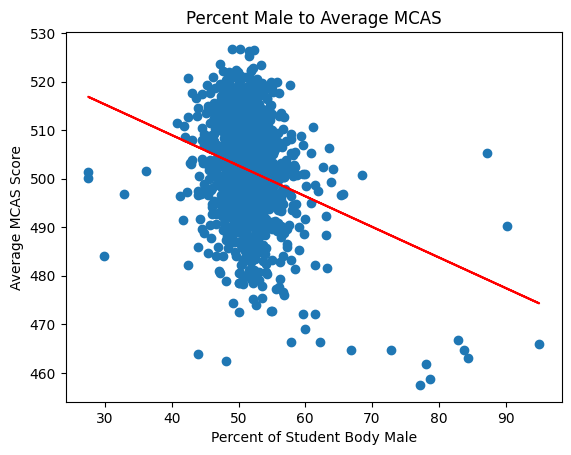

In [27]:
make_scatter_plot(x = 'Males', title = "Percent Male to Average MCAS", x_label = "Percent of Student Body Male")

### 1.3.2 Comparing Asian Population Percentage in School to School Performance

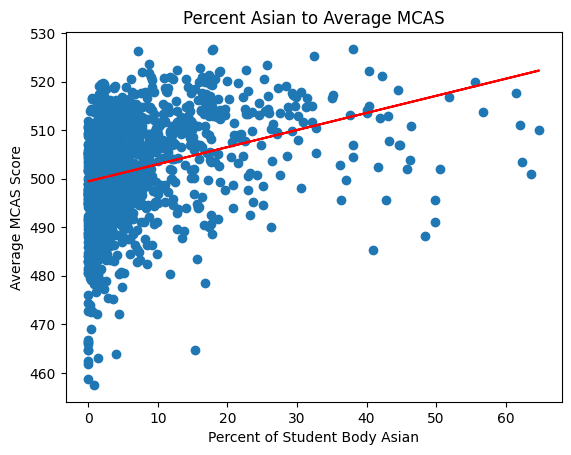

In [28]:
make_scatter_plot(x = 'Asian', title = "Percent Asian to Average MCAS", x_label = "Percent of Student Body Asian")

### 1.3.3 Comparing Black Population Percentage in School to School Performance

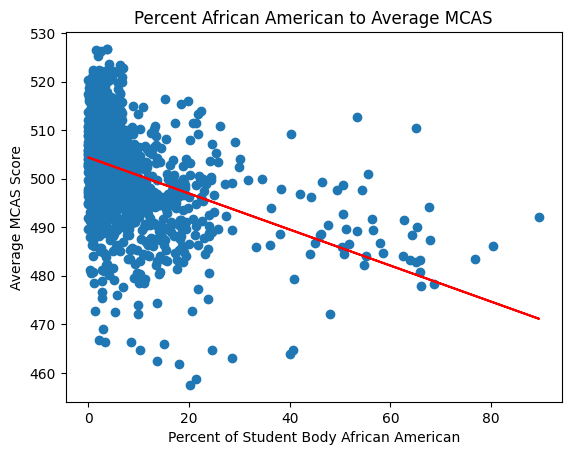

In [29]:
make_scatter_plot(x = 'African American', title = "Percent African American to Average MCAS", x_label = "Percent of Student Body African American")

### 1.3.4 Comparing Student: Teacher Ratio to School Performance

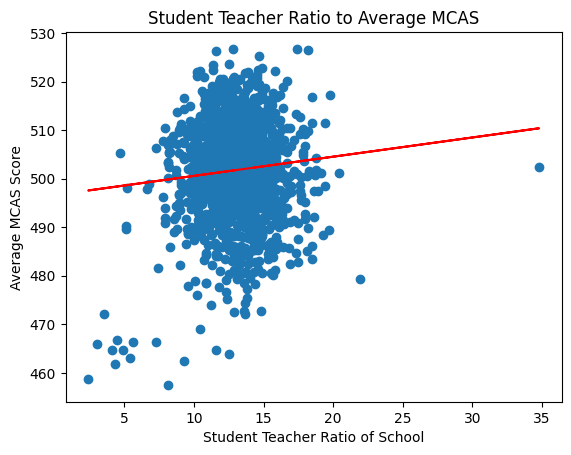

In [30]:
make_scatter_plot(x = 'student_teacher_ratio', title = "Student Teacher Ratio to Average MCAS", x_label = "Student Teacher Ratio of School")

### 1.3.5 Comparing Teacher Salary to School Performance

/var/folders/p3/2rl3dn4n7r1d7y2w809_2sdm0000gn/T/ipykernel_17694/1183881676.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  master_df['average salary int'] = master_df['Average Salary'].str.replace("$", "")


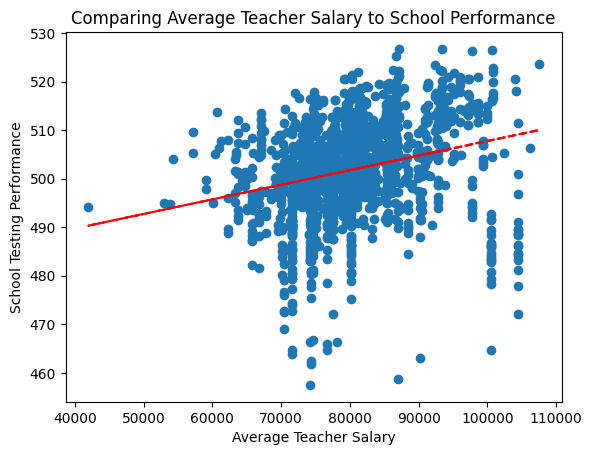

In [40]:
# Clean Data
master_df = master_df.dropna(subset=['Average Salary'])
master_df['average salary int'] = master_df['Average Salary'].str.replace("$", "")
master_df['average salary int'] = master_df['average salary int'].str.replace(",", "")
master_df['average salary int'] = master_df['average salary int'].astype(int)

master_df['average salary int']

# Generate some random data
x = master_df['average salary int']
y = master_df['avg_score']

# Fit a linear polynomial to the data
coeffs = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coeffs)

# Create a scatterplot of the data
plt.scatter(x, y)

# Add the linear fit line to the plot
plt.plot(x, poly1d_fn(x), '--r')

# Add axis labels and a title
plt.xlabel('Average Teacher Salary')
plt.ylabel('School Testing Performance')
plt.title('Comparing Average Teacher Salary to School Performance')

# Display the plot
plt.show()


### 1.3.6 Comparing Economically Disadvantaged % to School Performance

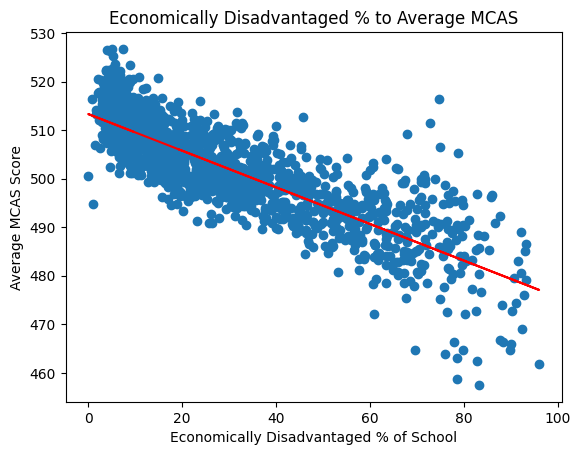

In [34]:
make_scatter_plot(x = 'Economically Disadvantaged %', title = "Economically Disadvantaged % to Average MCAS", x_label = "Economically Disadvantaged % of School")

### 1.3.7 Comparing First Language Not English % to School Performance

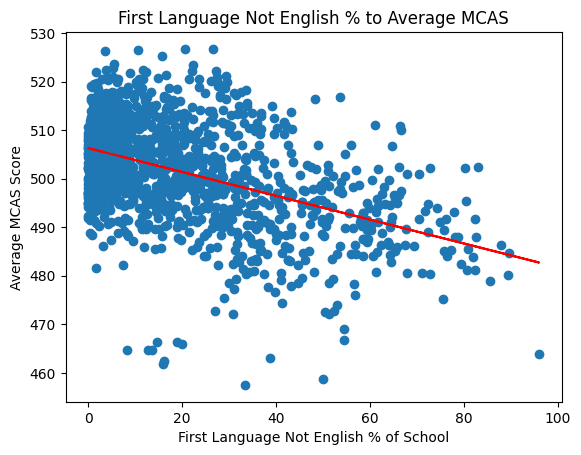

In [35]:
make_scatter_plot(x = 'First Language Not English %', title = "First Language Not English % to Average MCAS", x_label = "First Language Not English % of School")

### 1.3.8 Comparing State Funding Per Pupil to School Performance

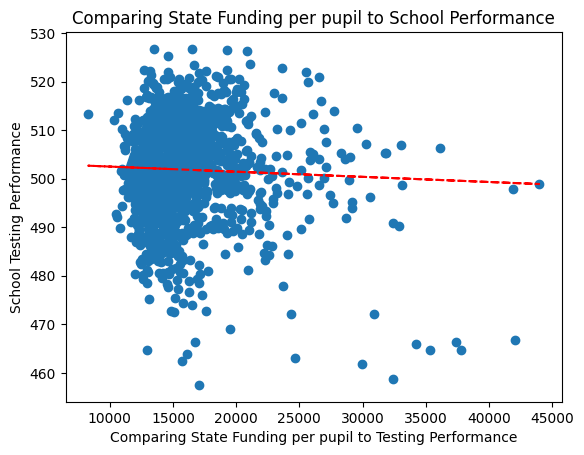

In [43]:
master_df = master_df.dropna(subset=['pp_stloc_raw_MA'])

# Generate some random data
x = master_df['pp_stloc_raw_MA']
y = master_df['avg_score']

# Fit a linear polynomial to the data
coeffs = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coeffs)

# Create a scatterplot of the data
plt.scatter(x, y)

# Add the linear fit line to the plot
plt.plot(x, poly1d_fn(x), '--r')

# Add axis labels and a title
plt.xlabel('Comparing State Funding per pupil to Testing Performance')
plt.ylabel('School Testing Performance')
plt.title('Comparing State Funding per pupil to School Performance')

# Display the plot
plt.show()

### 1.3.9 Comparing Fed Funding Per Pupil to School Performance

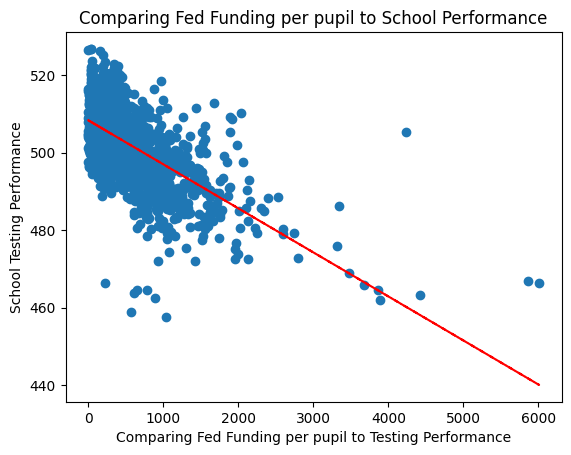

In [46]:
master_df = master_df.dropna(subset=['pp_fed_raw_MA'])

# Generate some random data
x = master_df['pp_fed_raw_MA']
y = master_df['avg_score']

# Fit a linear polynomial to the data
coeffs = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coeffs)

# Create a scatterplot of the data
plt.scatter(x, y)

# Add the linear fit line to the plot
plt.plot(x, poly1d_fn(x), '--r')

# Add axis labels and a title
plt.xlabel('Comparing Fed Funding per pupil to Testing Performance')
plt.ylabel('School Testing Performance')
plt.title('Comparing Fed Funding per pupil to School Performance')

# Display the plot
plt.show()

### 1.3.10 Reflection

We identified some negative correlations with school testing performance: Percent of Student Body Male, Percent of Student Body African American, Economically Disadvantages % of School, First Language Not English % of School, State Funding per Pupil, Fed Funding per Pupil

Positive correlations: Percent of Student Body Asian, Student Teacher Ratio, Average Teacher Salary.

We believe that some of the features are highly correlated together in the sense that they schools cluster around a group of features. High performing schools will have many positive correlation features and low performing schools will have many negative correlation features.

## 1.4 Cross Correlation Analysis

/var/folders/p3/2rl3dn4n7r1d7y2w809_2sdm0000gn/T/ipykernel_17694/813467970.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


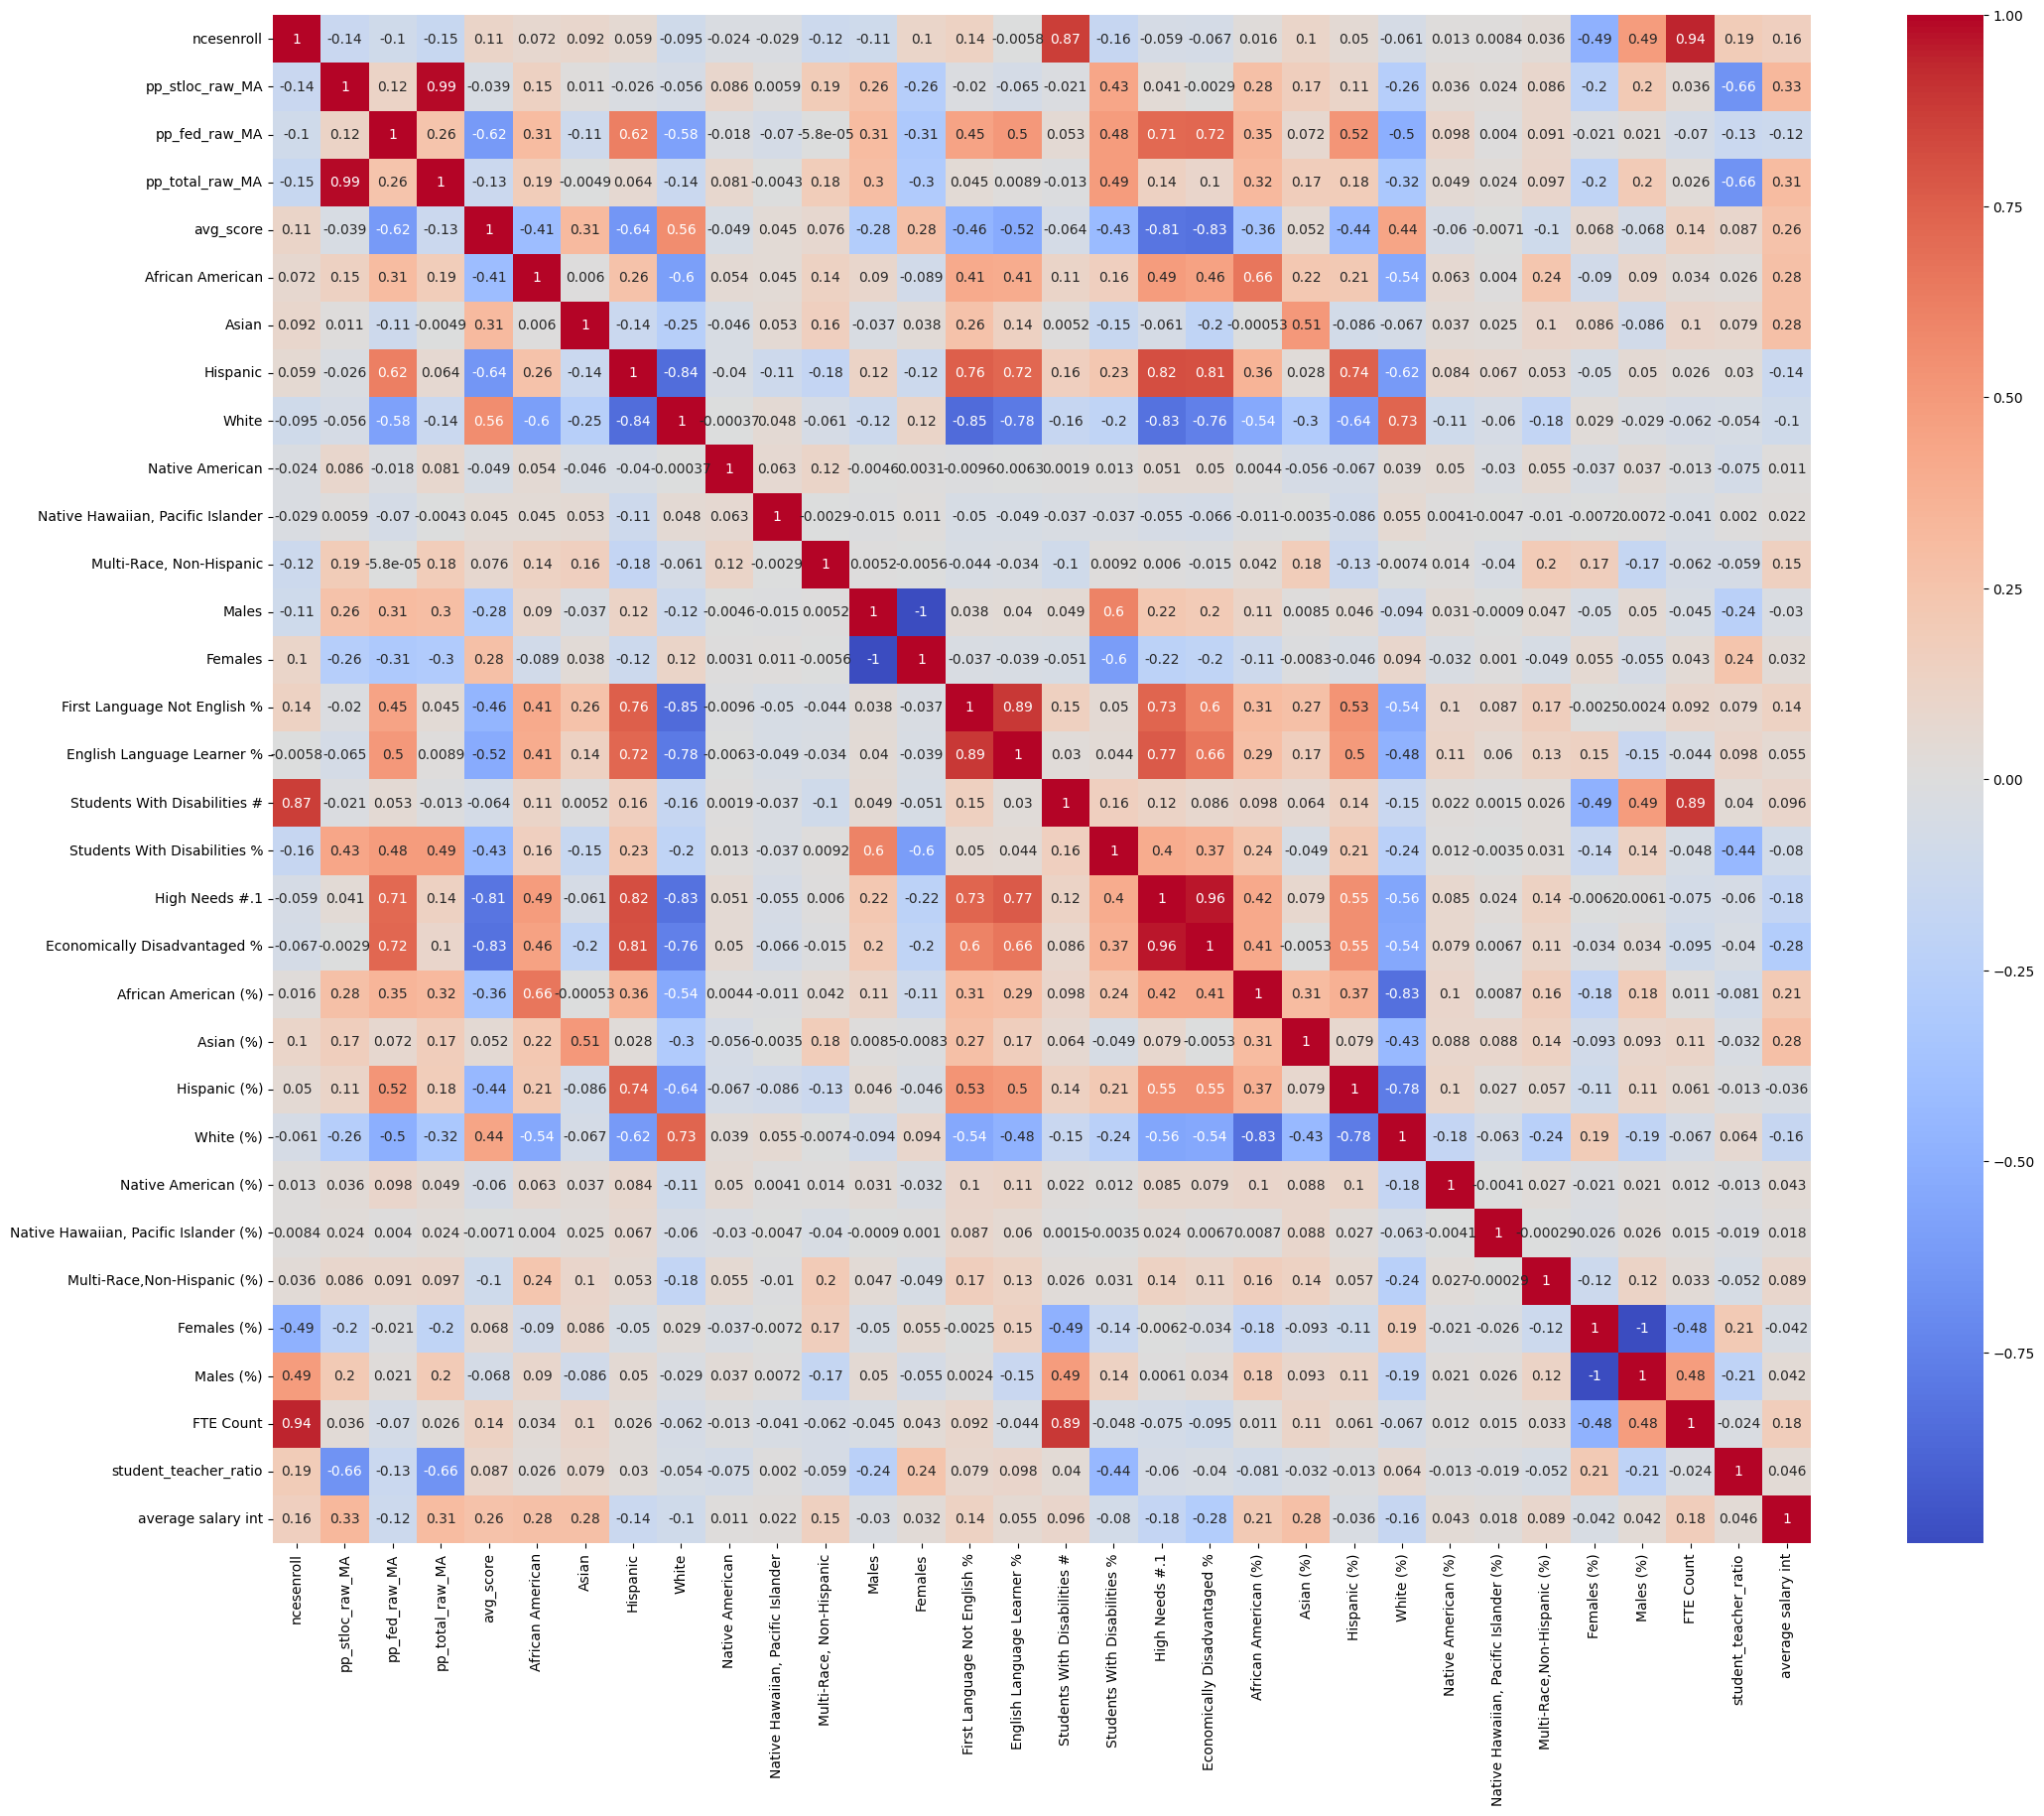

In [ ]:
import seaborn as sns

# Define the list of columns to drop
cols_to_drop = ['schoolstloc_raw_MA', 'schoolfed_raw_MA', 'schooltot_raw_MA', 'distname', 'schoolname', 'flag_nerds', 'flag_f33', 'gradespan', 'distname_lower', 'schoolname_lower', 'School Name', 'School Code', 'ELA_elem', 'MATH_elem', 'SCI', 'avg_score_elem', 'ELA_hs', 'MATH_hs', 'avg_score_hs', '# in Cohort', '% Graduated', '% Still in School', '% Non-Grad Completers', '% H.S. Equiv.', '% Dropped Out', '% Permanently Excluded', 'Low Income #', 'Low Income %', 'Free Lunch #', 'Free Lunch %', 'Reduced Lunch #', 'Reduced Lunch %', 'nan_flag', 'District Name', 'District Code', 'Salary Totals', 'Average Salary', 'FTE Count_teacher_salary']

# Drop the columns from the dataframe
df = master_df.drop(cols_to_drop, axis=1)

# Calculate the correlation coefficients
correlations = df.corr()

fig, ax = plt.subplots(figsize=(25, 20))

# Create the heatmap plot
sns.heatmap(correlations, cmap='coolwarm', annot=True, ax=ax)

# Display the plot
# plt.subplots(figsize=(100, 80))
plt.show()

We decided to pick various economic, racial, and social indicators of a school to identify correlations between the features. This takes us one step closer to identifying the cluster of features within school profiles.

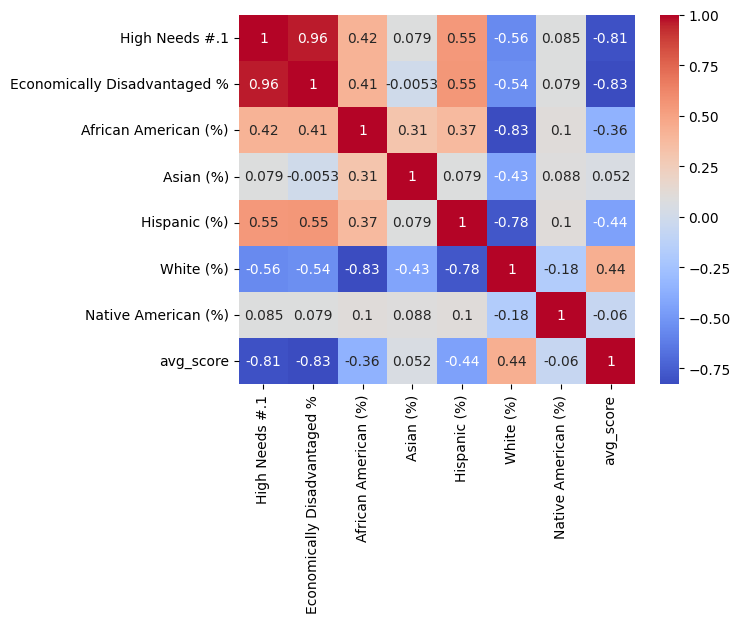

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load your dataframe from file or wherever you have it

# select the columns you want to calculate correlation with
columns_of_interest = ['High Needs #.1', 'Economically Disadvantaged %', 'African American (%)', 'Asian (%)', 'Hispanic (%)', 'White (%)', 'Native American (%)']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest + ['avg_score']].corr()

# create a heatmap of the correlations
sns.heatmap(correlations, cmap='coolwarm', annot=True)

# display the heatmap
plt.show()


## 1.5 Next Steps

Questions:
- Is there a difference in performance trends between elementary schools, middle schools, and high schools?
- What type of features do high performing, high income schools have?
- What type of features do low performing, high income schools have?
- What type of features do low performing, low income schools have?
- What type of features do high performing, low income schools have?
- Do schools form clusters around their respective school districts? In other words, is there a wide disparity in performance within a school district or low disparity?
- Why does Fed Funding per Pupil have a significantly more negative correlation to State Funding Per Pupil